https://www.kaggle.com/startupsci/titanic-data-science-solutions

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
#acquire data
train_df = pd.read_csv('S:\\SandeepG\\Official\\DataScience\\Kaggle\\Titanic\\titanicGitHub.csv')
#test_df = pd.read_csv('../input/test.csv')
#combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# preview the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.info()
print('*'*40)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
****************************************


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# include only those column where dtype is Object ('O')
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sage, Miss. Dorothy Edith ""Dolly""",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


In [8]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [9]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [10]:
train_df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
train_df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


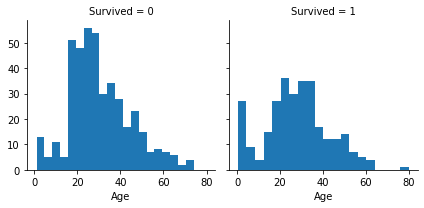

In [12]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


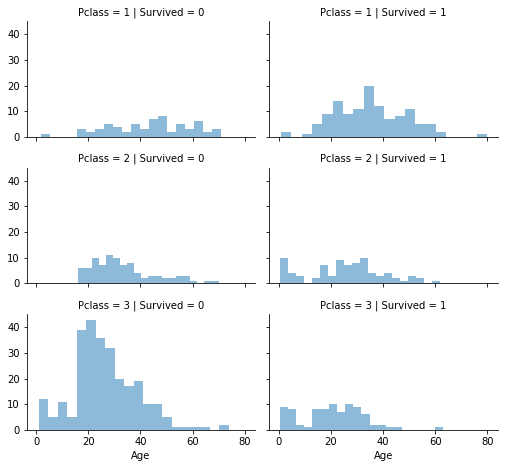

In [13]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


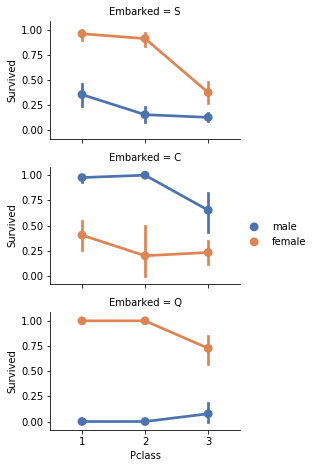

In [14]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


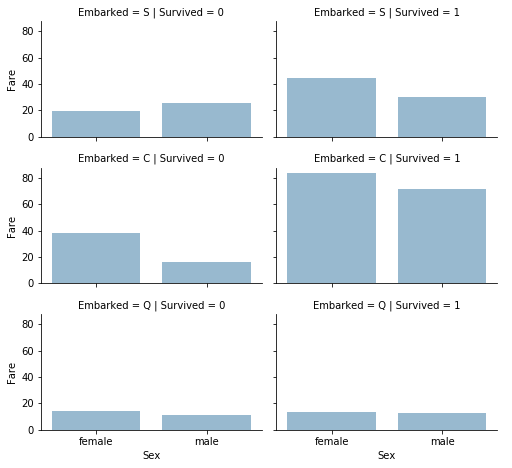

In [15]:
# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [16]:
# we do not have test_df

print("Before", train_df.shape) #, test_df.shape, combine[0].shape, combine[1].shape)

train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
#test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
#combine = [train_df, test_df]

"After", train_df.shape #, test_df.shape, combine[0].shape, combine[1].shape

Before (891, 12)


('After', (891, 10))

In [17]:
import re
patterns = ['Mr\.', 'Mrs\.', 'Miss\.', 'Master\.', 'Ms\.', 'Rev\.', 'Dr\.']


for index, row in train_df.iterrows(): 
    
    name = row['Name']
    
    for pattern in patterns:
        searched = re.search(pattern, name)
        if searched:
            train_df.at[index,'Title'] = searched.group(0)

In [18]:
train_df[~train_df['Title'].notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,27.7208,C,NaN
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,69.3000,C,NaN
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,S,NaN
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,26.5500,S,NaN
556,557,1,1,"Duff Gordon, Lady. (Lucille Christiana Sutherl...",female,48.0,1,0,39.6000,C,NaN
599,600,1,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,56.9292,C,NaN
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,69.3000,C,NaN
647,648,1,1,"Simonius-Blumer, Col. Oberst Alfons",male,56.0,0,0,35.5000,C,NaN
694,695,0,1,"Weir, Col. John",male,60.0,0,0,26.5500,S,NaN
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,49.5042,C,NaN


In [19]:
train_df['Title'].value_counts(dropna=False)

Mr.        517
Miss.      182
Mrs.       125
Master.     40
NaN         13
Dr.          7
Rev.         6
Ms.          1
Name: Title, dtype: int64

In [20]:
# we are good to drop the Name column now so that our model can focus on important features only
train_df.drop(['Name', 'PassengerId'], axis=1, inplace = True)

In [21]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,Mr.
1,1,1,female,38.0,1,0,71.2833,C,Mrs.
2,1,3,female,26.0,0,0,7.9250,S,Miss.
3,1,1,female,35.0,1,0,53.1000,S,Mrs.
4,0,3,male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Rev.
887,1,1,female,19.0,0,0,30.0000,S,Miss.
888,0,3,female,NaN,1,2,23.4500,S,Miss.
889,1,1,male,26.0,0,0,30.0000,C,Mr.


In [22]:
# continuing further to convert a categorical feature to ordinal

train_df.loc[(train_df.Sex == 'male'),'Sex']= 0
train_df.loc[(train_df.Sex == 'female'),'Sex']= 1
train_df['Sex'] = train_df['Sex'].astype(int)

In [23]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr.
1,1,1,1,38.0,1,0,71.2833,C,Mrs.
2,1,3,1,26.0,0,0,7.9250,S,Miss.
3,1,1,1,35.0,1,0,53.1000,S,Mrs.
4,0,3,0,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,Rev.
887,1,1,1,19.0,0,0,30.0000,S,Miss.
888,0,3,1,NaN,1,2,23.4500,S,Miss.
889,1,1,0,26.0,0,0,30.0000,C,Mr.


In [24]:
# next, we will try to fill in NaN values for different features so that our model can do better prediction
# before model prediction to predict label, we need to predict the missing feature value
# don't get confused between the two predictions, model will predict the lable (surived : Y/N) whereas 
# as of now we are predict a missing value for feature to give our model a cleaner data

# let's start filling up NaN value for Age feature
train_df['Age'].value_counts(dropna=False) # results in 177 NaN rows

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [25]:
# three ways to predict missing Age feature

# 1. assign any random number between mean and standard deviation for Age
# 2. identify a co-relation of Age with other features (like PClass and Sex) and then estimate Age
# 3. combine 1 & 2 : identify co-relation and then assign random number between mean and std dev

# method 1 & 3 are expected to introduce random noise in feature. Sticking to method 2 only.

# let's analyze PClass and Sex distribution
print(train_df['Pclass'].value_counts(dropna=False) )
print(train_df['Sex'].value_counts(dropna=False) )

3    491
1    216
2    184
Name: Pclass, dtype: int64
0    577
1    314
Name: Sex, dtype: int64


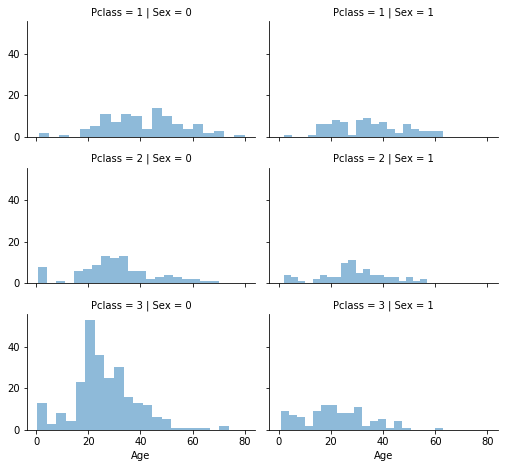

In [26]:
# plotting Pclass and Sex
grid = sns.FacetGrid(train_df, row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [27]:
df = train_df.copy()
df['Age'].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
66.00      1
23.50      1
0.42       1
Name: Age, Length: 89, dtype: int64

In [28]:

for sex in range(0, 2): # Sex is 0 or 1
    print('\n')
    for pclass in range(0, 3): # Pclass is 1, 2 or 3 (increment handled in code below)
        ageAvailable_df = df[(df['Sex'] == sex) & (df['Pclass'] == pclass + 1) & (~df['Age'].isnull())]
        ageMissing_df = df[(df['Sex'] == sex) & (df['Pclass'] == pclass + 1) & (df['Age'].isnull())]
        print('Sex, Pclass :', sex, pclass + 1, \
              ' Available Shape : ', ageAvailable_df.shape, \
              ' Missing Shape : ', ageMissing_df.shape, \
              ' Age Mean : ', ageAvailable_df['Age'].mean())
        
        # as a first attempt, just assign mean age to all missing ones
        # better approach might be identify outliers for each category;identify correlation;assign age
        df['Age'][(df['Sex'] == sex) & (df['Pclass'] == pclass + 1) & (df['Age'].isnull())] = ageAvailable_df['Age'].mean()
        



Sex, Pclass : 0 1  Available Shape :  (101, 9)  Missing Shape :  (21, 9)  Age Mean :  41.28138613861386
Sex, Pclass : 0 2  Available Shape :  (99, 9)  Missing Shape :  (9, 9)  Age Mean :  30.74070707070707
Sex, Pclass : 0 3  Available Shape :  (253, 9)  Missing Shape :  (94, 9)  Age Mean :  26.507588932806325


Sex, Pclass : 1 1  Available Shape :  (85, 9)  Missing Shape :  (9, 9)  Age Mean :  34.61176470588235
Sex, Pclass : 1 2  Available Shape :  (74, 9)  Missing Shape :  (2, 9)  Age Mean :  28.722972972972972
Sex, Pclass : 1 3  Available Shape :  (102, 9)  Missing Shape :  (42, 9)  Age Mean :  21.75


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [29]:
df['Age'].value_counts(dropna=False)

26.507589    94
21.750000    42
24.000000    30
22.000000    27
18.000000    26
             ..
34.500000     1
66.000000     1
0.420000      1
24.500000     1
14.500000     1
Name: Age, Length: 94, dtype: int64

In [30]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,Mr.
1,1,1,1,38.0,1,0,71.2833,C,Mrs.
2,1,3,1,26.0,0,0,7.9250,S,Miss.
3,1,1,1,35.0,1,0,53.1000,S,Mrs.
4,0,3,0,35.0,0,0,8.0500,S,Mr.


In [31]:
# Let us create Age bands and determine correlations with Survived.

df['AgeBand'] = pd.cut(train_df['Age'], 5)
df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.369942
2,"(32.252, 48.168]",0.404255
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
df.dtypes

Survived       int64
Pclass         int64
Sex            int32
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Title         object
AgeBand     category
dtype: object

In [34]:
df['Age'] = df['Age'].astype(int)
df.dtypes

Survived       int64
Pclass         int64
Sex            int32
Age            int32
SibSp          int64
Parch          int64
Fare         float64
Embarked      object
Title         object
AgeBand     category
dtype: object

In [35]:
df['Age'].value_counts(dropna=False)

26    112
21     66
30     36
24     31
28     29
     ... 
74      1
66      1
12      1
53      1
80      1
Name: Age, Length: 71, dtype: int64

In [36]:
# Let us replace Age with ordinals based on these bands.

df.loc[(df['Age'] <= 16),'Age'] = 0
df.loc[(df['Age'] > 16) & (df['Age'] <= 32),'Age'] = 1
df.loc[(df['Age'] > 32) & (df['Age'] <= 48),'Age'] = 2
df.loc[(df['Age'] > 48) & (df['Age'] <= 64),'Age'] = 3
df.loc[(df['Age'] > 64),'Age'] = 3

df['Age'].value_counts(dropna=False)

1    495
2    216
0    100
3     80
Name: Age, dtype: int64